In [2]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import shuffle

In [103]:
modelFolder = '075'

In [104]:
def calcParams(testing, predict):
    zdorovieTesting = 0
    bolnieTesting = 0
    for item in testing:    
        if item == 0:
            zdorovieTesting += 1
        else:
            bolnieTesting += 1
    #print(zdorovieTesting, bolnieTesting);
    zdoroviePredict = 0
    bolniePredict = 0
    for item in predict:    
        if item == 0:
            zdoroviePredict += 1
        else:
            bolniePredict += 1
    #print(zdoroviePredict, bolniePredict);

    chuvstv = bolniePredict / bolnieTesting
    specifich = zdoroviePredict / zdorovieTesting
    return chuvstv,specifich

In [124]:
data = pd.read_csv(modelFolder + '/data.csv', 
                   delimiter=',', 
                   names=['0ртм', '1ртм', '2ртм', '3ртм', '4ртм', '5ртм', '6ртм', '7ртм', '8ртм', 
                          '0ик', '1ик', '2ик', '3ик', '4ик', '5ик', '6ик', '7ик', '8ик', 'target'])
trainingTemperatures = data[['0ртм', '1ртм', '2ртм', '3ртм', '4ртм', '5ртм', '6ртм', '7ртм', '8ртм', 
                          '0ик', '1ик', '2ик', '3ик', '4ик', '5ик', '6ик', '7ик', '8ик']]
trainingTemperatures = shuffle(trainingTemperatures)
trainingTemperatures.reset_index(inplace=True, drop=True)
data.head()

,0ртм,1ртм,2ртм,3ртм,4ртм,5ртм,6ртм,7ртм,8ртм,0ик,1ик,2ик,3ик,4ик,5ик,6ик,7ик,8ик,target
0,33.2,32.9,32.8,33.0,33.3,33.3,33.2,33.9,33.6,30.7,30.6,30.7,31.2,31.1,30.6,30.9,30.8,30.8,0
1,34.9,34.1,34.0,33.8,33.2,32.9,33.7,33.2,33.6,32.3,31.7,31.8,31.6,31.1,31.0,30.6,31.0,30.8,0
2,32.8,33.2,33.9,33.4,34.0,33.7,33.3,33.1,32.7,31.5,31.8,31.8,30.9,32.1,31.1,30.4,30.5,29.7,0
3,32.2,32.0,32.1,31.8,33.1,32.6,31.9,31.3,30.9,30.1,30.1,30.3,29.8,30.6,30.4,29.7,29.2,28.6,0
4,34.9,35.3,35.2,35.1,35.0,34.7,34.9,35.1,35.1,31.6,32.4,32.7,32.9,33.3,32.8,32.0,32.2,34.2,0


In [121]:
testingData = pd.read_csv(modelFolder + '/testing.csv', 
                          delimiter=',', 
                          names=['0ртм', '1ртм', '2ртм', '3ртм', '4ртм', '5ртм', '6ртм', '7ртм', '8ртм', 
                          '0ик', '1ик', '2ик', '3ик', '4ик', '5ик', '6ик', '7ик', '8ик', 'target'])
testingTemperatures = testingData[['0ртм', '1ртм', '2ртм', '3ртм', '4ртм', '5ртм', '6ртм', '7ртм', '8ртм', 
                          '0ик', '1ик', '2ик', '3ик', '4ик', '5ик', '6ик', '7ик', '8ик']]

# Метод SVM

In [125]:
#SVM
clf = svm.SVC(gamma='scale')
clf.fit(trainingTemperatures, data.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Правильно определено: 27 
Неправильно: 13
Чувствительность: 0.55 
Специфичность: 1.45


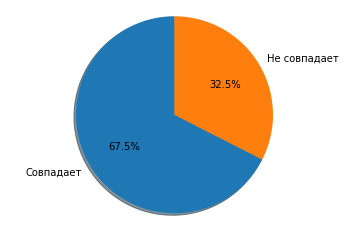

In [126]:
classes = clf.predict(testingTemperatures)

testingData.target
res = testingData.target == classes
trueCount = 0
for el in res:
    if el == True:
        trueCount += 1

print('Правильно определено:', trueCount, '\nНеправильно:', len(res) - trueCount)
chuvstv, specifich = calcParams(testingData.target, classes)
print('Чувствительность:', chuvstv, '\nСпецифичность:', specifich);

labels = 'Совпадает', 'Не совпадает'
values = [trueCount, len(res) - trueCount]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

# Метод KNN (Ближайших соседей)

In [99]:
#KNN
clf = neighbors.KNeighborsClassifier(20, weights='uniform')
clf.fit(trainingTemperatures, data.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

Правильно определено: 21 
Неправильно: 19
Чувствительность: 0.65 
Специфичность: 1.35


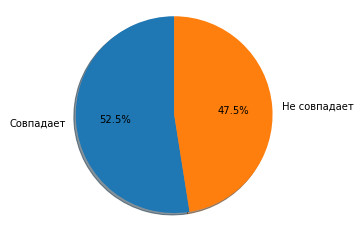

In [100]:
classes = clf.predict(testingTemperatures)

testingData.target
res = testingData.target == classes
trueCount = 0
for el in res:
    if el == True:
        trueCount += 1

print('Правильно определено:', trueCount, '\nНеправильно:', len(res) - trueCount)
chuvstv, specifich = calcParams(testingData.target, classes)
print('Чувствительность:', chuvstv, '\nСпецифичность:', specifich);

labels = 'Совпадает', 'Не совпадает'
values = [trueCount, len(res) - trueCount]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

# Наивный баейсовский классификатор

In [101]:
#NB
gnb = GaussianNB()
clf = gnb.fit(trainingTemperatures, data.target)

Правильно определено: 19 
Неправильно: 21
Чувствительность: 0.75 
Специфичность: 1.25


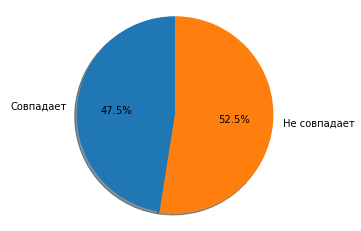

In [102]:
classes = clf.predict(testingTemperatures)

testingData.target
res = testingData.target == classes
trueCount = 0
for el in res:
    if el == True:
        trueCount += 1

print('Правильно определено:', trueCount, '\nНеправильно:', len(res) - trueCount)
chuvstv, specifich = calcParams(testingData.target, classes)
print('Чувствительность:', chuvstv, '\nСпецифичность:', specifich);

labels = 'Совпадает', 'Не совпадает'
values = [trueCount, len(res) - trueCount]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()